In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset using scikit-learn
# Explicitly setting the parser to 'auto' to avoid the FutureWarning
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')

X = mnist['data']
y = mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
X_train, y_train = X.iloc[:60000,:], y.iloc[:60000]

In [5]:
X_test, y_test = X.iloc[60000:,:], y.iloc[60000:]

## Q1

### randomforest - original data

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [7]:
# the features have a range of 0-255 so seems no need any scaling 

In [8]:
import time
start_time_rf = time.time()

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

end_time_rf = time.time()
execution_time_rf = end_time_rf - start_time_rf

In [9]:
rf_predict = rf_model.predict(X_test)

### randomforest - PCA 0.95

In [10]:
start_time_rf_pca = time.time()

from sklearn.decomposition import PCA

rf_pca_model = make_pipeline(PCA(n_components=0.95), RandomForestClassifier())
rf_pca_model.fit(X_train, y_train)

end_time_rf_pca = time.time()
execution_time_rf_pca = end_time_rf_pca - start_time_rf_pca

In [11]:
pca_step = rf_pca_model.named_steps['pca']
X_train_pca = pca_step.transform(X_train)

In [12]:
rf_pca_predict = rf_pca_model.predict(X_test)

In [13]:
print('Randomforest  Original data      accuracy:', accuracy_score(y_test, rf_predict), '  f1 score:', f1_score(y_test, rf_predict,average='micro'))
print('Randomforest  PCA (0.95)         accuracy:', accuracy_score(y_test, rf_pca_predict), '  f1 score:', f1_score(y_test, rf_pca_predict,average='micro'))
print('no of fearures reduced from', X_train.shape[1],'to', X_train_pca.shape[1],'after fitting PCA with an explained variance ratio of 95%.')

print('Execution time Randomforest changed from:',round(execution_time_rf, 1), 'sec with original data to:', round(execution_time_rf_pca,1),'sec with PCA reduced')

Randomforest  Original data      accuracy: 0.9695   f1 score: 0.9695
Randomforest  PCA (0.95)         accuracy: 0.9477   f1 score: 0.9477000000000001
no of fearures reduced from 784 to 154 after fitting PCA with an explained variance ratio of 95%.
Execution time Randomforest changed from: 30.9 sec with original data to: 105.8 sec with PCA reduced


In [14]:
###

# Randomforest results are pretty much the same, Original data showing slightly better accuracy and f1 score
# execution time increased for PCA model! Surprised!


### SGDClassifier - original data

In [15]:
from sklearn.linear_model import SGDClassifier

start_time_sgd = time.time()

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

end_time_sgd = time.time()
execution_time_sgd = end_time_sgd - start_time_sgd

In [16]:
sgd_predict = rf_model.predict(X_test)

### SGDClassifier - PCA

In [17]:
start_time_sgd_pca = time.time()

sgd_pca_model = make_pipeline(PCA(n_components=0.95), SGDClassifier())
sgd_pca_model.fit(X_train, y_train)

end_time_sgd_pca = time.time()
execution_time_sgd_pca = end_time_sgd_pca - start_time_sgd_pca
sgd_pca_predict = sgd_pca_model.predict(X_test)

In [18]:
print('SGDClassifier  Original data      accuracy:', accuracy_score(y_test, sgd_predict), '  f1 score:', f1_score(y_test, rf_predict, average='micro'))
print('SGDClassifier  PCA (0.95)         accuracy:', accuracy_score(y_test, sgd_pca_predict), '  f1 score:', f1_score(y_test, sgd_pca_predict, average='micro'))
print('no of fearures reduced from', X_train.shape[1],'to', X_train_pca.shape[1],'after fitting PCA with an explained variance ratio of 95%.')

print('Execution time SGDClassifier changed from:',round(execution_time_sgd, 1), 'sec with original data to:', round(execution_time_sgd_pca,1),'sec')

SGDClassifier  Original data      accuracy: 0.9695   f1 score: 0.9695
SGDClassifier  PCA (0.95)         accuracy: 0.8912   f1 score: 0.8912
no of fearures reduced from 784 to 154 after fitting PCA with an explained variance ratio of 95%.
Execution time SGDClassifier changed from: 116.8 sec with original data to: 26.6 sec


In [19]:
###

# SGDClassifier results for original data shows quit better accuracy and f1 score
# However, execution time as expected decreased seignificanrly for PCA model!


## Q2

In [20]:
# Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to 2 dimensions and plot the result 
# using Matplotlib.

In [21]:
data = X.iloc[:5000,:]
label = y.iloc[:5000]

### t-SNE dimension reduction

In [22]:
from sklearn.manifold import TSNE
# dimension reduction --> 2 dimensions

tsne = TSNE(n_components=2)
tsne_transformed = tsne.fit_transform(data)
tsne_transformed.shape

(5000, 2)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

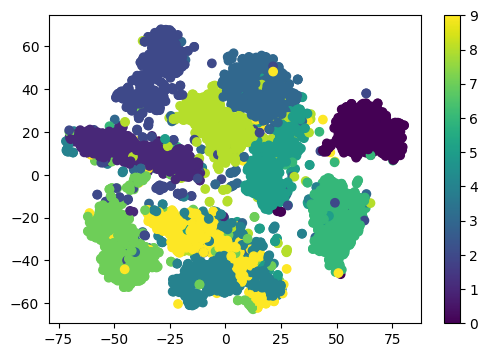

In [24]:
# use a scatterplot using 10different colors to represent each image’s target class

plt.figure(figsize=(6,4))
scatter = plt.scatter(tsne_transformed[:,0], tsne_transformed[:,1], c= label.cat.codes)
plt.colorbar(scatter)
plt.show()

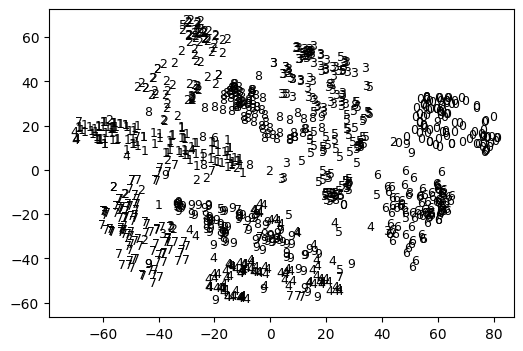

In [25]:
# Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class 
# (a digit from 0 to 9) or plot scaled-down versions of the digit images
# the first 1000 instances are chosen

plt.figure(figsize=(6,4))
plt.scatter(tsne_transformed[:1000, 0], tsne_transformed[:1000, 1], facecolor = 'none')

# annotate each point with its corresponding number in label.cat.codes
for i, txt in enumerate(label.cat.codes[:1000]):
    plt.annotate(txt, (tsne_transformed[i, 0], tsne_transformed[i, 1]), fontsize=9)

plt.show()

### PCA dimension reduction

In [26]:
# dimension reduction --> 2 dimensions

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)
pca_transformed.shape

(5000, 2)

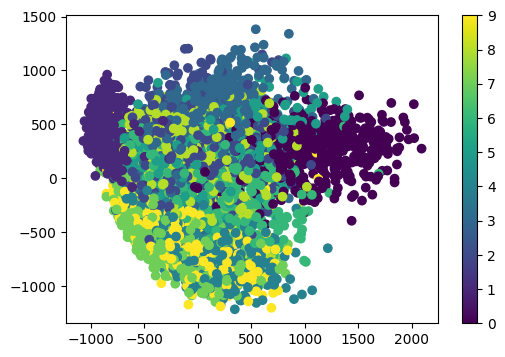

In [27]:
# use a scatterplot using 10different colors to represent each image’s target class

plt.figure(figsize=(6,4))
scatter = plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c= label.cat.codes)
plt.colorbar(scatter)
plt.show()

### MDS dimension reduction

In [ ]:
# unfortunately my system couldn't handle MDS training and kept crashing

In [ ]:
# from sklearn.manifold import MDS
# # dimension reduction --> 2 dimensions

# mds = MDS(n_components=2) 
# mds_transformed = mds.fit_transform(data)
# mds_transformed.shape

In [ ]:
# # use a scatterplot using 10different colors to represent each image’s target class

# plt.figure(figsize=(6,4))
# scatter = plt.scatter(mds_transformed[:,0], mds_transformed[:,1], c= label.cat.codes)
# plt.colorbar(scatter)
# plt.show()

### LLE dimension reduction

In [29]:
from sklearn.manifold import LocallyLinearEmbedding
# dimension reduction --> 2 dimensions

lle = LocallyLinearEmbedding(n_components=2)
lle_transformed = lle.fit_transform(data)
lle_transformed.shape

(5000, 2)

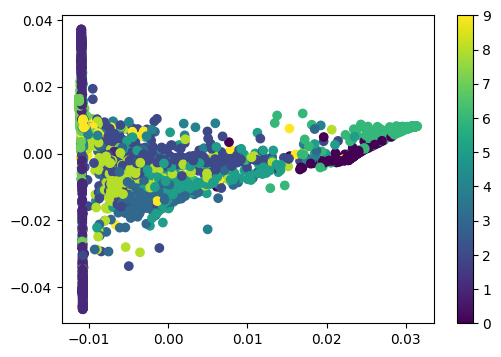

In [30]:
# use a scatterplot using 10different colors to represent each image’s target class

plt.figure(figsize=(6,4))
scatter = plt.scatter(lle_transformed[:,0], lle_transformed[:,1], c= label.cat.codes)
plt.colorbar(scatter)

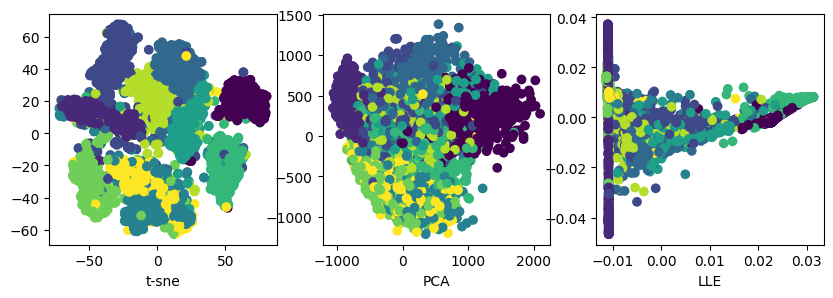

In [49]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.scatter(tsne_transformed[:,0], tsne_transformed[:,1], c= label.cat.codes)
plt.xlabel('t-sne')

plt.subplot(1,3,2)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c= label.cat.codes)
plt.xlabel('PCA')

plt.subplot(1,3,3)
plt.scatter(lle_transformed[:,0], lle_transformed[:,1], c= label.cat.codes)
plt.xlabel('LLE')

plt.show()

In [50]:
# obviouly tsne by far is doing a better job
# PCA has been good for explaning just a part of the data and LLE is the worst.

## Q3

In [78]:
# Step1: Dropping Constant Features using VarianceThreshold

# all columns with column variance threshold less than 0.05 droped

In [79]:
data.shape

(5000, 784)

In [133]:
# column variance threshold: 0.05

non_var_zero_cols = []
for col_name, col_data in data.items():
    if col_data.std() > 0.05:
        non_var_zero_cols.append(col_name)
len(non_var_zero_cols)

663

In [134]:
data_variance_filtered = data[non_var_zero_cols]

In [135]:
##

# I also used VarianceThreshold library, but I don't know why the outputs are different!
# 663 vs 658

In [129]:
from sklearn.feature_selection import VarianceThreshold

variance_selection = VarianceThreshold(threshold = 0.05)
variance_selection.fit_transform(data).shape


(5000, 658)

In [130]:
mask = variance_selection.get_support()
variance_selected_columns = data.columns[mask]
variance_selected_data = data[variance_selected_columns]
variance_selected_data.shape

(5000, 658)

In [ ]:
# Step2: Apply a filter-based approach to rank the features based on their individual relevance to the 
# target variable.

In [137]:
###

# to check the relevance to the target, SelectKbest is chosen and criteria is f_classif
# as long as features are numerical and target is multivariate categorical --> ANOVA (f_classif) is chosen
# k =10 --> the 10 most relevant features selected


In [146]:
from sklearn.feature_selection import SelectKBest, f_classif

relevant_selector = SelectKBest(f_classif, k=10)
relevant_selected_data = relevant_selector.fit_transform(variance_selected_data, label)

In [147]:
relevant_selected_data.shape

(5000, 10)

In [148]:
# Step3: using wrapper-based method and evaluate the selected subset of features.

In [149]:
###

# as long as the dataset is not too large and there are just 10 columns left, Recursive Feature Elimination
# is chosen to detect the best columns fitted to the data


In [160]:
from sklearn.feature_selection import RFE

# as the label is categorical, LogisticRegression is chosen for estimator
from sklearn.linear_model import LogisticRegression

# the LogisticRegression warning cannot converge and asked scaling the data. (the issue solved after scale up) 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

relevant_scaled_data = scaler.fit_transform(relevant_selected_data)
wrapper_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)
wrapper_selected_data = wrapper_selector.fit_transform(relevant_scaled_data, label)
wrapper_selected_data.shape

(5000, 5)